In [41]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from hw1 import *

## Mathematical and Numerical Physics
### Numerical part 1
#### Kevin Vonk, s1706896, _Nov - Dec 2020_

## Problem 1
### a.
The Euler Forward scheme has been implemented in Python using the ways discussed in the lecture notes. We will run the simulation using $n_x \in \{8, 16, 32\}$. The generating code and resulting figures are found below. Here, we will also discuss the results.

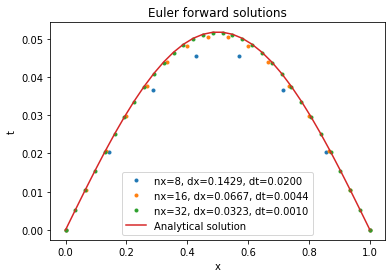

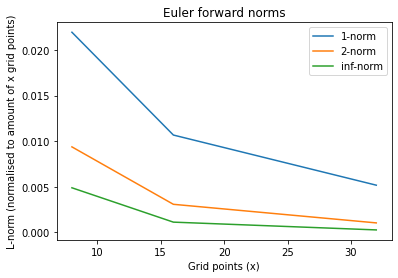

In [42]:
# Define some constants
ords = (1, 2, np.inf)
norms = [[] for ord in ords]

steps = (8, 16, 32)
x = (0, 1)
t = (0, 0.6)
M = 0.5
t_end = 0.6

# Compute the initial conditions and analytical solution
ic = lambda x, _: np.sin(np.pi * x)
ana = lambda x, t: np.exp(-M * np.pi**2 * t) * np.sin(np.pi * x)
err = lambda num, ana: num - ana

# Compute the solution for all given grid points in x
for nx in steps:
    nt = EulerForward1D.stable_time_steps(x, t, nx, M)
    ef = EulerForward1D(xbounds = x, tbounds = t, nx = nx, nt = nt, ic = ic, M = M)

    solution = ef.fullsolve()
    error = err(solution, ana(ef.x, t[1]))
    norms = [[*norm, np.mean(np.linalg.norm(error, ord=ord))] for norm, ord in zip(norms, ords)]
    
    plt.plot(ef.x, solution, '.', label=f"nx={nx}, dx={ef.dx:.4f}, dt={ef.dt:.4f}")

# Plot the results
plt.plot(ef.x, ana(ef.x, t[1]), label="Analytical solution")
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.title("Euler forward solutions")

plt.figure(2)
for norm, ord in zip(norms, ords):
    plt.plot(steps, norm, label=f"{ord}-norm")

plt.legend()
plt.xlabel("Grid points (x)")
plt.ylabel("L-norm (normalised to amount of x grid points)")
plt.title("Euler forward norms");

As we can observe from the numerical solutions, when we increase the amount of grid points we converge closer to the analytical solution. Note that increasing the amount of positional grid points also increases the amount of time grid points in order for the numerical stability to hold. The amount of grid points is computed automatically using the Von Neumann method, minimising the amount of required time grid points whilst still providing numerical stability.

The computed averaged / normalised norms show a similar picture, where the increase in grid points yield smaller errors.

### b.
Now, we implement the DuFort Frankel method. We need to ensure that $\frac{\Delta t}{\Delta x} \rightarrow 0$. This can be reinterpreted as $\Delta t \ll \Delta x$. A reasonable approximation to this is taking $\Delta t = 10^{-2} \Delta x$.

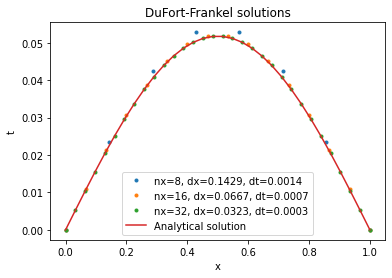

In [43]:
# Compute the solution for the various given grid steps
for nx in steps:
    nt = DuFortFrankel1D.stable_time_steps(x, t, nx)
    dff = DuFortFrankel1D(xbounds = x, tbounds = t, nx = nx, nt = nt, ic = ic, M = M)
    dff.fullsolve()

    plt.plot(dff.x, dff.solution, '.', label=f"nx={nx}, dx={dff.dx:.4f}, dt={dff.dt:.4f}")

# Plot the results
plt.plot(ef.x, ana(ef.x, t[1]), label="Analytical solution")
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.title("DuFort-Frankel solutions");

We can see from the resulting plot that the DuFort-Frankel method also nicely converges to the analytical solution. Of note here is that the DuFort-Frankel method seems to converge to the analytical solution using less positional grid points. However, the flip side of this is that our time step is about 6 times smaller, so the increased accuracy could just as well come from this decreased time step. One could argue that the factor $10^{2}$ difference between the time steps and the positional steps needn't be this big, but there is no clear cut limit given that needs to be upheld. In any case, this solution method seems stable using these paramters and provides a good convergence to the analytical solution.

### c.
